In [52]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import copy as cop
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,plot_roc_curve

In [61]:
df = pd.read_csv('student-por.csv')
print(df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

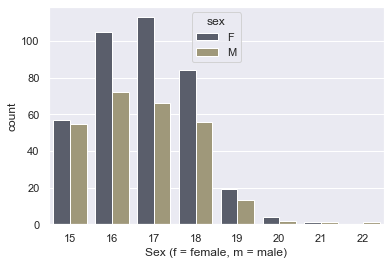

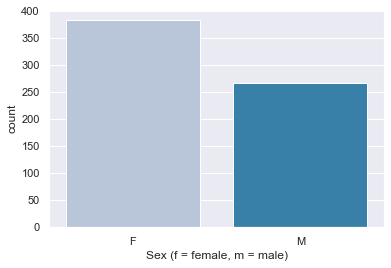

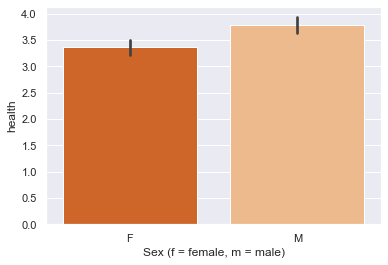

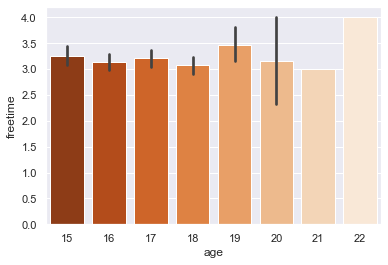

In [62]:
sns.countplot(x='age',hue='sex', data=df, palette="cividis")
plt.xlabel("Sex (f = female, m = male)")
plt.show()

sns.countplot(x='sex', data=df, palette='PuBu')
plt.xlabel("Sex (f = female, m = male)")
plt.show()

sns.barplot(x='sex',y='health', data=df,palette="Oranges_r");
plt.xlabel("Sex (f = female, m = male)")
plt.show()

sns.barplot(x='age',y='freetime', data=df,palette="Oranges_r");
plt.show()


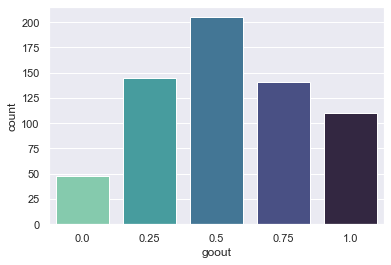

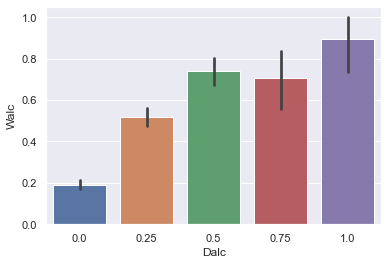

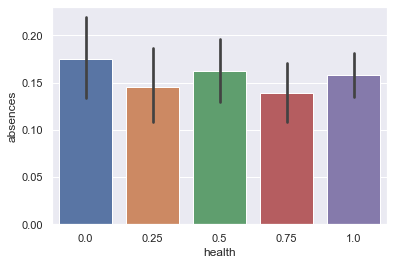

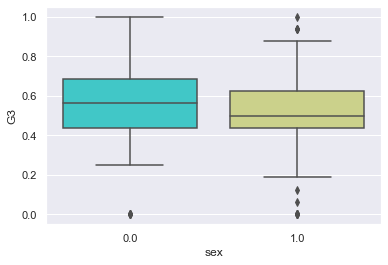

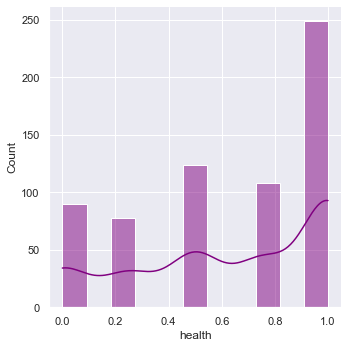

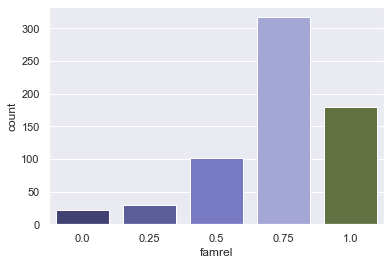

In [79]:
sns.countplot(x='goout', data=df, palette="mako_r")
plt.show()
sns.barplot(x='Dalc',y='Walc', data=df);
plt.show()

sns.barplot(x='health',y='absences', data=df);
plt.show()

sns.boxplot(x='sex', y='G3', data=df, palette='rainbow')
plt.show()

sns.displot(data=df,x='health',kde=True,color='purple')
plt.show()

sns.countplot(x='famrel', data=df, palette="tab20b")
plt.show()




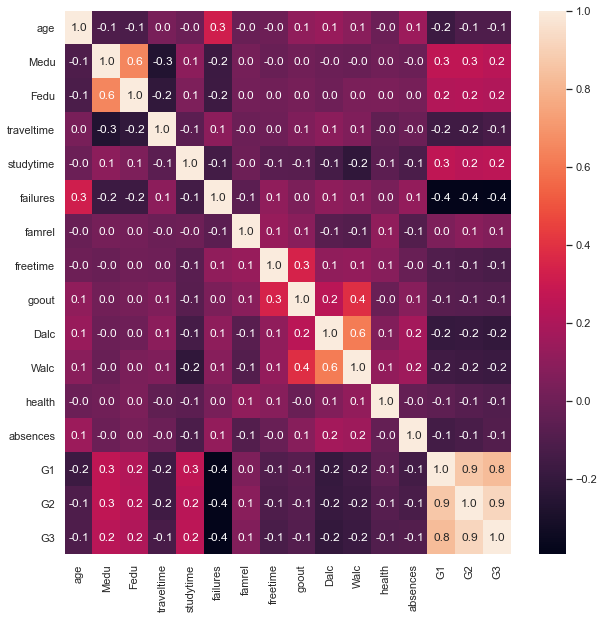

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [65]:
le = LabelEncoder()
normDf = df[df.columns[:]].apply(le.fit_transform)
print(normDf)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0    3        1        0        0     4     4     0     4  ...   
1         0    0    2        1        0        1     1     1     0     2  ...   
2         0    0    0        1        1        1     1     1     0     2  ...   
3         0    0    0        1        0        1     4     2     1     3  ...   
4         0    0    1        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0    4        0        0        1     2     3     3     2  ...   
645       1    0    3        1        1        1     3     1     4     3  ...   
646       1    0    3        1        0        1     1     1     2     2  ...   
647       1    1    2        1        1        1     3     1     3     3  ...   
648       1    1    3        0        1        1     3     2     3     2  ...   

     famrel  freetime  goou

In [66]:
columns = []
for column in normDf.columns:
    columns.append(column)
print(columns)
x = normDf.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = columns



['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [75]:
dataX=normDf.drop(['Pstatus','Walc','sex','Mjob', 'Fjob', 'G1', 'G2'],axis=1)
dataY=normDf['Pstatus']
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, dataX, dataY, cv=4)
print("Tree cross-validation:"+str(round(scores.mean(),3)))
forest = RandomForestClassifier()
scores = cross_val_score(forest, dataX, dataY, cv=4)
print("Forest cross-validation:"+str(round(scores.mean(),3)))

Tree cross-validation:0.758
Forest cross-validation:0.875


In [73]:
x_train,x_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=0)
tree.fit(x_train,y_train)
forest.fit(x_train,y_train)
treePred = tree.predict(x_test)
forestPred = forest.predict(x_test)
print("Accuracy(tree):"+str(round(accuracy_score(treePred, y_test),3)))
print("Accuracy(forest):"+str(round(accuracy_score(forestPred, y_test),3)))
print("Precision(tree):"+str(round(precision_score(treePred, y_test),3)))
print("Precision(forest):"+str(round(precision_score(forestPred, y_test),3)))
print("Recall(tree):"+str(round(recall_score(treePred, y_test),3)))
print("Recall(forest):"+str(round(recall_score(forestPred, y_test),3)))
print("F1_score(tree):"+str(round(f1_score(treePred, y_test),3)))
print("F1_score(forest):"+str(round(f1_score(forestPred, y_test),3)))

Accuracy(tree):0.792
Accuracy(forest):0.838
Precision(tree):0.89
Precision(forest):1.0
Recall(tree):0.866
Recall(forest):0.838
F1_score(tree):0.878
F1_score(forest):0.912


In [146]:
dataX=normDf.drop(['Pstatus','Walc','sex','Mjob', 'Fjob', 'G1', 'G2'],axis=1)
dataY=normDf['Pstatus']
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, dataX, dataY, cv=4)
print("Результаты до варьирования:")
print("Tree cross-validation:"+str(round(scores.mean(),3)))
forest = RandomForestClassifier()
scores = cross_val_score(forest, dataX, dataY, cv=4)
print("Forest cross-validation:"+str(round(scores.mean(),3)))
tree = DecisionTreeClassifier(max_depth = 2,min_samples_split=45,min_samples_leaf=10,criterion="entropy")
scores = cross_val_score(tree, dataX, dataY, cv=4)
print("После варьирования:")
print("Tree cross-validation:"+str(round(scores.mean(),3)))
forest = RandomForestClassifier(random_state=50,n_estimators=150,criterion="entropy",min_samples_split=300,max_features="log2")
scores = cross_val_score(forest, dataX, dataY, cv=4)
print("Forest cross-validation:"+str(round(scores.mean(),3)))

Результаты до варьирования:
Tree cross-validation:0.76
Forest cross-validation:0.874
После варьирования:
Tree cross-validation:0.877
Forest cross-validation:0.877


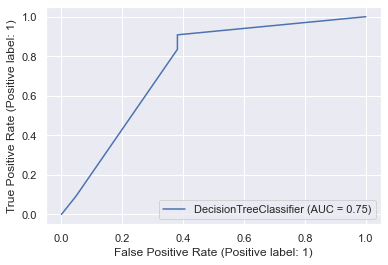

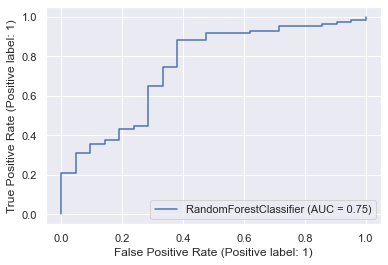

In [147]:
tree.fit(x_train,y_train)
forest.fit(x_train,y_train)
plot_roc_curve(tree,x_test,y_test)
plot_roc_curve(forest,x_test,y_test)
plt.show()